In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
#adding from tutorial https://betterprogramming.pub/how-to-scrape-multiple-pages-of-a-website-using-a-python-web-scraper-4e2c641cff8
from time import sleep
from random import randint
import numpy as np
from matplotlib import pyplot as plt

In [91]:
#read the page into Python
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [90]:
print(type(response))

<class 'requests.models.Response'>


### 1. Start by using either the inspector or by viewing the page source. Can you identify a tag that might be helpful for finding the names of all inductees? Make use of this to create a list containing just the names of each inductee.

In [55]:
soup = BeautifulSoup(response.content, 'html.parser')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [107]:
#This finds the artists but does not come in cleanly
results = soup.find_all('h3')
results

[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Johnny Bond</h3>]

In [109]:
type(results) #bs4.element.ResultSet
#type(artists[0]) #bs4.element.Tag  
#A Tag object corresponds to an XML or HTML tag in the original document


bs4.element.ResultSet

In [118]:
#Use this for artists
results = soup.find_all('h3')
results

artists = []
for result in results:
    name = result.text
    artists.append(name)

In [111]:
len(artists)

9

In [119]:
artists

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

In [93]:
type(artists)

list

### Next, try and find a tag that could be used to find the year that each member was inducted. Extract these into a list. When you do this, be sure to only include the year and not the full text. For example, for Roy Acuff, the list entry should be "1962" and not "Inducted 1962". Double-check that the resulting list has the correct number of elements and is in the same order as your inductees list.

In [81]:
years_list=soup.find_all('div', attrs={'class':'vertical-card_content--copy'})
print(years_list)

[<div class="vertical-card_content--copy">
<p>
                    Inducted 1962                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2001                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1966                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1973                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1969                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2013                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1999                  </p>
</div>]


In [113]:
#Use this to get the year inducted
year_inducted=[]

years_list=soup.find_all('div', attrs={'class':'vertical-card_content--copy'})
for year in years_list:
    yearin = year.get_text()[30:35].strip()
    year_inducted.append(yearin)

In [ ]:
#alternative way to clean the years
#year =[]
#for x in inducted_year:
#    year.append(x.strip().replace('Inducted ',""))
#year

In [115]:
year_inducted

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

In [89]:
type(year_inducted)

list

### Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame.

In [116]:
#df = pd.DataFrame(list(zip(lst, lst2)),columns =['Name', 'val'])
results_together = pd.DataFrame(list(zip(artists, year_inducted)), columns = ['Artist', 'Year'])

In [117]:
results_together.head()

,Artist,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973


### Take what you created for the first page and apply it across the rest of the pages so that you can scrape all inductees

In [120]:
#building blocks
page='2'
str = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'

#combine URL + page
url=str.format(page)
url

'https://countrymusichalloffame.org/hall-of-fame/members/page/2'

In [137]:
#Testing with page 2 (this works!)

#read the page into Python
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/3'
response = requests.get(website_url)

soup = BeautifulSoup(response.content, 'html.parser')

#Use this for artists
artists = []

artist_scrape = soup.find_all('h3')
for x in artist_scrape:
    name = x.text
    artists.append(name)
    
#Use this to get the year inducted
year_inducted=[]

years_scrape=soup.find_all('div', attrs={'class':'vertical-card_content--copy'})
for year in years_scrape:
    yearin = year.get_text()[30:35].strip()
    year_inducted.append(yearin)


In [138]:
artists

['Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran']

In [139]:
year_inducted

['1991', '2005', '2002', '1970', '1980', '2009', '2013', '1973', '2014']

### Once you have verified that your code will still work, write a for loop that will cycle through all 16 pages and build a DataFrame containing all inductees and the year of their induction.

In [97]:
#did not use this in the final scrape
page_list = []

pages = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
str = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'

for page in pages:
    url = str.format(page)
    page_list.append(url)

In [99]:
page_list

['https://countrymusichalloffame.org/hall-of-fame/members/page/1',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/2',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/3',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/4',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/5',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/6',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/7',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/8',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/9',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/10',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/11',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/12',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/13',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/14',
 'https://countrymusichalloffame.org/hall-of-fame/members

In [2]:
#NEW!
#Data Storage buckets
artists = []
year_inducted=[]

#The scrape
for page in range(1, 17):
    hof_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
    hof_page_url = hof_url + str(page)  #cast the page range as a string to add two strings together
    #sleep(randint(3,10)) #don't get blocked
    response = requests.get(hof_page_url)
    soup = BeautifulSoup(response.content, 'lxml')
    
    artist_scrape = soup.find_all('h3')
    for x in artist_scrape:
        name = x.text
        artists.append(name)
    
    years_scrape=soup.find_all('div', attrs={'class':'vertical-card_content--copy'})
    for year in years_scrape:
        yearin = year.get_text()[30:35].strip()
        year_inducted.append(yearin)

results_together1 = pd.DataFrame(list(zip(artists, year_inducted)), columns = ['Artist', 'Year'])

In [9]:
#for recreateing the dataframe ONLY
results_together1 = pd.DataFrame(list(zip(artists, year_inducted)), columns = ['Artist', 'Year'])

In [3]:
artists

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Roy Horton',
 'Har

In [11]:
year_inducted

['1962',
 '2005',
 '2001',
 '1966',
 '1973',
 '1969',
 '2005',
 '2013',
 '1999',
 '2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 '1967',
 '2018',
 '2003',
 '2012',
 

In [8]:
results_together1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  140 non-null    object
 1   Year    140 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [14]:
results_together1.sort_values('Year')

,Artist,Year
98,Jimmie Rodgers,1961
101,Fred Rose,1961
135,Hank Williams,1961
0,Roy Acuff,1962
95,Tex Ritter,1964
...,...,...
108,Ricky Skaggs,2018
48,Johnny Gimble,2018
114,Ray Stevens,2019
15,Brooks & Dunn,2019


In [20]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
results_together1.sort_values('Year')

,Artist,Year
98,Jimmie Rodgers,1961
101,Fred Rose,1961
135,Hank Williams,1961
0,Roy Acuff,1962
95,Tex Ritter,1964
125,Ernest Tubb,1965
52,George D. Hay,1966
70,Uncle David Macon,1966
34,Jim Denny,1966
3,Eddy Arnold,1966


In [11]:
#Need to edit the column type to integer for Year in order to plot on a histagram
results_together1['Year']=pd.to_numeric(results_together1['Year'])

### Create a visual using the data that you scraped. Prepare a short (<5 minute) presentation.

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

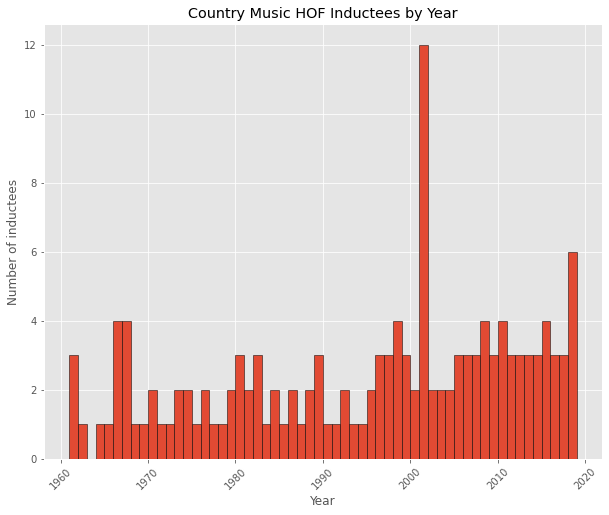

In [14]:
#fig = plt.figure(figsize=(8,4), dpi=100)
plt.style.use('ggplot')
results_together1.plot.hist('Year', bins=58, legend=False, ec = 'black', figsize=(10,8))
plt.title('Country Music HOF Inductees by Year')
plt.xlabel('Year')
plt.ylabel('Number of inductees')
plt.xticks(rotation=45)
#the year 1963 had no inductees

In [7]:
#Adding this new column completely destroys the histogram for some reason
results_together1['percent_total_inductees_by_year'] = (results_together1['Year'] / 58).round(2)

In [36]:
results_together1.head()

,Artist,Year,percent_total_inductees_by_year
0,Roy Acuff,1962,33.83
1,Alabama,2005,34.57
2,Bill Anderson,2001,34.50
3,Eddy Arnold,1966,33.90
4,Chet Atkins,1973,34.02


In [37]:
plt.scatter('Year', s = 'percent_total_inductees_by_year' )


TypeError: scatter() missing 1 required positional argument: 'y'